In [1]:
%load_ext autoreload
import os
workDir = os.getcwd()
user = 'testID' #CERN user ID
institution = 'UCSB' #UCSB
print(workDir)

/Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/FiducialsQC


In [2]:
%run utils/GetExcel.ipynb

#The sensor file can contain the fiducials of the sensor, but can also have the 
#component heights for sensor in location P1 or P2.
#Methods can run either way! 

pcbfile = workDir + '/data/some-PCB-file.xls'
fiducialfile = workDir + '/data/GantryTrayFiducialData.xls'
sensorfile = workDir + '/data/alethea test.xls'
#surveyfile = workDir + '/data/alethea test.xls'
surveyfile = workDir + '/data/V3_01 unconstrained shape 3.1.22 flatness redo.xls'

survey = GetExcel(surveyfile)
survey.read()
#print(survey.df)

sensor = GetExcel(sensorfile)
sensor.read()
#print(sensor.df.tail())

fiducial = GetExcel(fiducialfile)
fiducial.read()
#print(fiducial.df.head())

pcb = GetExcel(pcbfile)
pcb.read()
#print(pcb.df.head())

FILEPATHS MAY BE WRONG!! CANNOT FIND /Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/FiducialsQC/data/some-PCB-file.xls


In [3]:
%run utils/ReadDataframe.ipynb
%autoreload 2

if sensor.exists:
    senDF = ReadDataframe(sensor.df, sensorfile)
    senDF.readComponentFiducials()
    senDF.readComponentHeights()

if fiducial.exists:
    fidDF = ReadDataframe(fiducial.df, fiducialfile)
    fidDF.readTrayFiducials()

if pcb.exists:
    pcbDF = ReadDataframe(pcb.df, pcbfile)
    pcbDF.readComponentFiducials()
    pcbDF.readComponentHeights()
    
if survey.exists:
    surveyDF = ReadDataframe(survey.df, surveyfile)
    surveyDF.readComponentHeights()

In [4]:
%run utils/QualityControl.ipynb
%autoreload 2

if sensor.exists:
    sensorP1 = QualityControl(fidDF, senDF, 'P1', False)
    if len(senDF.pointsP1): sensorP1.runTransform()
    if len(senDF.heightP1): sensorP1.runHeights()
    sensorP1.rating()
    print(sensorP1)

    sensorP2 = QualityControl(fidDF, senDF, 'P2', False)
    if len(senDF.pointsP2): sensorP2.runTransform()
    if len(senDF.heightP2): sensorP2.runHeights()
    sensorP2.rating()
    print(sensorP2)
    
if pcb.exists:
    pcbP1 = QualityControl(fidDF, pcbDF, 'P1', True)
    if len(pcbDF.pointsP1): pcbP1.runTransform()
    if len(pcbDF.heightP1): pcbP1.runHeights()
    pcbP1.rating()
    print(pcbP1)

    pcbP2 = QualityControl(fidDF, pcbDF, 'P2', True)
    if len(pcbDF.pointsP2): pcbP2.runTransform()
    if len(pcbDF.heightP2): pcbP2.runHeights()
    pcbP2.rating()
    print(pcbP2)
    
if survey.exists:
    surveyComp = QualityControl(fidDF, surveyDF, 'Survey', False, True)
    if len(surveyDF.heightP1): surveyComp.runHeights()

The module/component in P1 has completed QC!
Rotation --> Left Fiducial: 90.257 degrees, Right Fiducial: 90.257 degrees
The angle of the sensor in position P1 is GREEN. 
Placement --> (x,y) = (0.029, -1.045) mm
The placement of the sensor in position P1 is RED. 

The FINAL rating of the module in position P1 is RED.

The module/component in P2 has completed QC!

The FINAL rating of the module in position P2 is NO INFO.



In [5]:
%run utils/CreateXML.ipynb
%autoreload 2

if sensor.exists:
    if sensorP1.finalRating != 'NO INFO':
        sensorP1XML = CreateXML(sensorP1, user, institution)
        sensorP1XML.save(senDF.dir, senDF.name + '_P1.xml')

    if sensorP2.finalRating != 'NO INFO':
        sensorP2XML = CreateXML(sensorP2, user, institution)
        sensorP2XML.save(senDF.dir, senDF.name + '_P2.xml')
    
if pcb.exists:
    if pcbP1.finalRating != 'NO INFO':
        pcbP1XML = CreateXML(pcbP1, user, institution)
        pcbP1XML.save(pcbDF.dir, pcbDF.name + '_P1.xml')
    
    if pcbP2.finalRating != 'NO INFO':
        pcbP2XML = CreateXML(pcbP2, user, institution)
        pcbP2XML.save(pcbDF.dir, pcbDF.name + '_P2.xml')

Saving UPLOAD XML file to  /Users/Matthew/Documents/SchoolWork/physics/GradNotes/ParticlePhysics/PostdocResearch/HGC/EstToolsSUSY/FiducialsQC/data/alethea test_P1_upload.xml


Plotting hexmaps


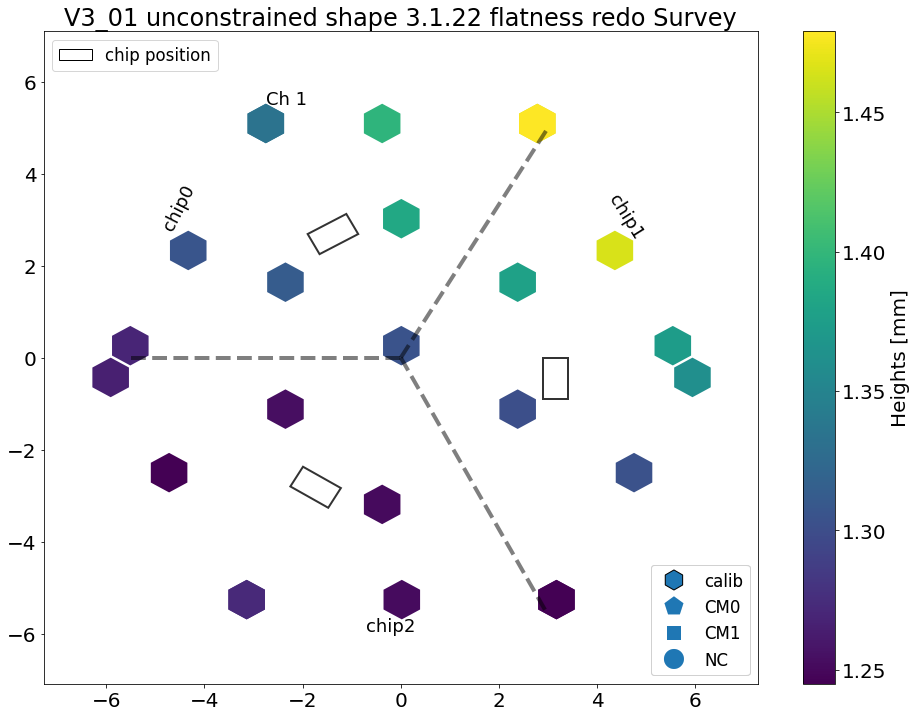

In [6]:
%run utils/HeightPlotter.ipynb
%autoreload 2

if sensor.exists:
    if len(sensorP1.hgts):
        label = senDF.name + ' P1'
        senPlotP1 = HeightPlotter(sensorP1.hgts, sensorP1.hXY, senDF.name + '_P1', senDF.dir + '/', label)
        senPlotP1.padMapping()
    
    if len(sensorP2.hgts):
        label = senDF.name + ' P2'
        senPlotP2 = HeightPlotter(sensorP2.hgts, sensorP2.hXY, senDF.name + '_P2', senDF.dir + '/', label)
        senPlotP2.padMapping()

if pcb.exists:
    if len(pcbP1.hgts):
        label = pcbDF.name + ' P1'
        pcbPlotP1 = HeightPlotter(pcbP1.hgts, pcbP1.hXY, pcbDF.name + '_P1', pcbDF.dir + '/', label)
        pcbPlotP1.padMapping()
        
    if len(pcbP2.hgts):
        label = pcbDF.name + ' P2'
        pcbPlotP2 = HeightPlotter(pcbP2.hgts, pcbP2.hXY, pcbDF.name + '_P2', pcbDF.dir + '/', label)
        pcbPlotP2.padMapping()
        
if survey.exists:
    if len(surveyComp.hgts):
        label = surveyDF.name + ' Survey'
        surveyPlot = HeightPlotter(surveyComp.hgts, surveyComp.hXY, surveyDF.name + '_survey', surveyDF.dir + '/', label)
        surveyPlot.padMapping()